## NIH
https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia/data

In [10]:
import os
import csv

def create_csv_for_split(dataset_root, split):
    split_dir = os.path.join(dataset_root, split)
    # Map split names to new CSV filenames
    split_to_csv = {"train": "nih_train.csv", "test": "nih_test.csv", "val": "nih_val.csv"}
    output_csv = os.path.join(dataset_root, split_to_csv.get(split, f"{split}.csv"))
    rows = []
    # Each directory contains subdirectories "NORMAL" and "PNEUMONIA"
    for label_name, label in [("NORMAL", 0), ("PNEUMONIA", 1)]:
        label_dir = os.path.join(split_dir, label_name)
        if not os.path.isdir(label_dir):
            continue
        for fname in os.listdir(label_dir):
            fpath = os.path.join(label_dir, fname)
            if os.path.isfile(fpath):
                # Remove the dataset_root and split part from the path for CSV output
                rel_path = os.path.relpath(fpath, dataset_root)
                # Remove the split prefix (train/, test/, val/) from the path
                rel_path_no_split = rel_path[len(split)+1:] if rel_path.startswith(split + os.sep) else rel_path
                # Replace backslashes with forward slashes for CSV output
                rel_path_no_split = rel_path_no_split.replace('\\', '/')
                rows.append([rel_path_no_split, label])
    with open(output_csv, "w", newline="") as f:
        writer = csv.writer(f)
        writer.writerow(["Path", "Pneumonia"])
        writer.writerows(rows)

    # Print summary
    num_normal = sum(1 for row in rows if row[1] == 0)
    num_pneumonia = sum(1 for row in rows if row[1] == 1)
    print(f"{split.capitalize()} set: {num_normal} NORMAL, {num_pneumonia} PNEUMONIA images.")

def main(dataset_root):
    # Expected name per directory structure: "train", "val", "test"
    for split in ["train", "val", "test"]:
        create_csv_for_split(dataset_root, split)

# Change this to your dataset root path
dataset_root = r"./NIH_Chest_XR_Pneumonia"
main(dataset_root)
# Example usage:
# main(r"C:\path\to\dataset_root")

Train set: 1341 NORMAL, 3875 PNEUMONIA images.
Val set: 30 NORMAL, 30 PNEUMONIA images.
Test set: 212 NORMAL, 368 PNEUMONIA images.


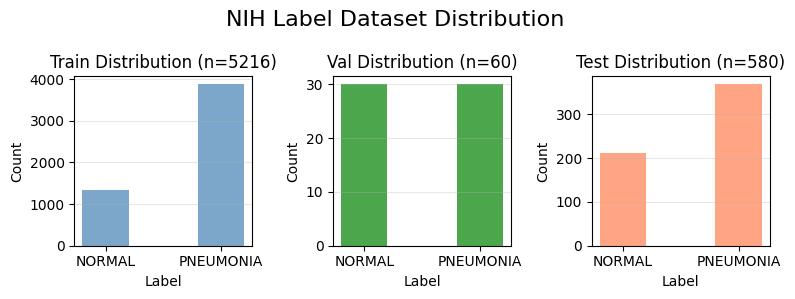

Train: {'NORMAL': 1341, 'PNEUMONIA': 3875}
Val: {'NORMAL': 30, 'PNEUMONIA': 30}
Test: {'NORMAL': 212, 'PNEUMONIA': 368}


In [10]:
log_text= "Train set: 1341 NORMAL, 3875 PNEUMONIA images. Val set: 30 NORMAL, 30 PNEUMONIA images. Test set: 212 NORMAL, 368 PNEUMONIA images."

# Parse the log text
import re
import matplotlib.pyplot as plt

# Extract numbers using regex
train_match = re.search(r'Train set: (\d+) NORMAL, (\d+) PNEUMONIA', log_text)
val_match = re.search(r'Val set: (\d+) NORMAL, (\d+) PNEUMONIA', log_text)
test_match = re.search(r'Test set: (\d+) NORMAL, (\d+) PNEUMONIA', log_text)

# Create data dictionary
data = {
    'Train': {'NORMAL': int(train_match.group(1)), 'PNEUMONIA': int(train_match.group(2))},
    'Val': {'NORMAL': int(val_match.group(1)), 'PNEUMONIA': int(val_match.group(2))},
    'Test': {'NORMAL': int(test_match.group(1)), 'PNEUMONIA': int(test_match.group(2))}
}

# Create bar chart
fig, axes = plt.subplots(1, 3, figsize=(8, 3))

# Add figure title
fig.suptitle('NIH Label Dataset Distribution', fontsize=16)

splits = ['Train', 'Val', 'Test']
colors = ['steelblue', 'green', 'coral']

for idx, (split, color) in enumerate(zip(splits, colors)):
    labels = list(data[split].keys())
    counts = list(data[split].values())
    total = sum(counts)
    
    axes[idx].bar(labels, counts, color=color, alpha=0.7, width=0.4)
    axes[idx].set_title(f'{split} Distribution (n={total})')
    axes[idx].set_xlabel('Label')
    axes[idx].set_ylabel('Count')
    axes[idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Print summary
for split in splits:
    print(f"{split}: {data[split]}")